In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../PIH_DA/Datas_sets/AccidentesAviones.csv')

Gran cantidad de los datos, son nulos, eleminamos la hora declarada ya que tiene demasiados datos nulos, ademas el horario es relativo a la zona,eliminamos tambien la columnra 'flight_no' ya que tambien contiene gran cantidad de datos nulos y es informacion irrelevante.


Creamos una columna para aislar el anio, el dia y el mes, de la fecha para poder filtrar mejor la base de datos.

In [3]:
df['year']=1
df['month']=1
df['day']=1

In [4]:
for index, i in enumerate(df['fecha']):
    df['year'][index]=i.split(',')[1]

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2808417228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][index]=i.split(',')[1]


In [5]:
for index, i in enumerate(df['fecha']):
    df['month'][index]=(i.split(',')[0]).split(' ')[0]

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2229957710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][index]=(i.split(',')[0]).split(' ')[0]


In [6]:
for index, i in enumerate(df['fecha']):
    df['day'][index]=(i.split(',')[0]).split(' ')[1]

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2448986348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][index]=(i.split(',')[0]).split(' ')[1]


In [7]:
df['year']=df['year'].apply(lambda x:int(x))

In [8]:
ndf=df[df['year']>=1970]

for i in ndf:
 count=0
 for e in ndf[i]:
     if e == '?':
         count+=1 
 print(i,count)

Unnamed: 0 0
fecha 0
HORA declarada 615
Ruta 1
OperadOR 1
flight_no 1729
route 296
ac_type 1
registration 115
cn_ln 230
all_aboard 2
PASAJEROS A BORDO 91
crew_aboard 92
cantidad de fallecidos 0
passenger_fatalities 104
crew_fatalities 104
ground 5
summary 17
year 0
month 0
day 0


In [9]:
df=df[~df.index.isin(df[df['all_aboard']=='?'].index.to_list())]

In [10]:
df['all_aboard'].replace(['?'],'0',inplace=True)
df['ground'].replace(['?'],'0',inplace=True)
df['cantidad de fallecidos'].replace(['?'],'0',inplace=True)


In [11]:
for i in df[['all_aboard','cantidad de fallecidos','ground']]:
    df[i]=df[i].apply(lambda x:int(x))

In [12]:
df.reset_index(inplace=True)


Separamos de la columna ruta el estado,la ciudad y el pais.

In [13]:
df['state']=0
df['city']=0
df['country']=0

In [14]:
for index, i in enumerate(df['Ruta']):
    if  len(i.split(','))==1:
        e=i.split(',')[0]
        df['city'][index]=e
    elif len(i.split(','))==2:
        e=i.split(',')[0]
        f=i.split(',')[1]
        df['city'][index]=e
        df['state'][index]=f
    elif len(i.split(','))==3:
        e=i.split(',')[0]
        f=i.split(',')[1]
        g=i.split(',')[2]
        df['city'][index]=e
        df['state'][index]=f
        df['country'][index]=g
    elif len(i.split(','))==4:
        e=i.split(',')[0]
        
        g=i.split(',')[3]
        df['city'][index]=e

        df['country'][index]=g


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2178328842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'][index]=e
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2178328842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'][index]=f
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_50836\2178328842.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'][index]=g


Seleccionamos los datos relevenates y filtramos los datos en ? que no nos portan informacion.

In [15]:
df=df[['day','month','year','fecha','Ruta','OperadOR','ac_type','registration','all_aboard','cantidad de fallecidos','ground','summary','city','state','country','ground']]

In [16]:
df['mortality_rate']=df['cantidad de fallecidos']/df['all_aboard']

In [17]:
df[df['mortality_rate']==1]

,day,month,year,fecha,Ruta,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,city,state,country,ground,mortality_rate
1,07,September,1909,"September 07, 1909","Juvisy-sur-Orge, France",?,Wright Byplane,SC1,1,1,0,Eugene Lefebvre was the first pilot to ever be...,Juvisy-sur-Orge,France,0,0,1.0
2,12,July,1912,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?,5,5,0,First U.S. dirigible Akron exploded just offsh...,Atlantic City,New Jersey,0,0,1.0
3,06,August,1913,"August 06, 1913","Victoria, British Columbia, Canada",Private,Curtiss seaplane,?,1,1,0,The first fatal airplane accident in Canada oc...,Victoria,British Columbia,Canada,0,1.0
5,17,October,1913,"October 17, 1913","Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),?,28,28,0,Hydrogen gas which was being vented was sucked...,Near Johannisthal,Germany,0,0,1.0
7,03,September,1915,"September 03, 1915","Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),?,19,19,0,"Exploded and burned near Neuwerk Island, when...",Off Cuxhaven,Germany,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,29,March,2020,"March 29, 2020","Manila, Philippines",Lion Air Inc.,IAI 1124A Westwind II,RP-C5880,8,8,0,The air ambulance crashed on takeoff from runw...,Manila,Philippines,0,0,1.0
4984,09,January,2021,"January 09, 2021","Near Jakarta, Indonesia",Sriwijaya Air,Boeing 737-524,PK-CLC,62,62,0,Sriwijaya Air flight 182 was climbing through ...,Near Jakarta,Indonesia,0,0,1.0
4985,02,March,2021,"March 02, 2021","Pieri, Sudan",South Sudan Supreme Airlines,Let L-410UVP-E,HK-4274,10,10,0,One of the engines on the aircraft failed 10 m...,Pieri,Sudan,0,0,1.0
4987,21,May,2021,"May 21, 2021","Near Kaduna, Nigeria",Military - Nigerian Air Force,Beechcraft B300 King Air 350i,NAF203,11,11,0,"While on final approach, in poor weather condi...",Near Kaduna,Nigeria,0,0,1.0


In [18]:
df[df['mortality_rate']<=.20]

,day,month,year,fecha,Ruta,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,city,state,country,ground,mortality_rate
80,27,August,1923,"August 27, 1923","East Mallling, United Kingdom",Air Union,Farman F.60 Goliath,F-AECB,11,1,0,The aircraft lost an engine about 45 minutes i...,East Mallling,United Kingdom,0,0,0.090909
111,18,August,1926,"August 18, 1926","Hurst, Kent, England",Air Union,Bleriot 155,F-AIEB,15,3,0,The plane made a forced landing at Romney Mars...,Hurst,Kent,England,0,0.200000
115,21,October,1926,"October 21, 1926",English Channel,Imperial Airways,Handley Page W-10,G-EBMS,12,0,0,The plane was on a flight from London to Paris...,English Channel,0,0,0,0.000000
126,22,August,1927,"August 22, 1927","Sevenoaks, England",KLM Royal Dutch Airlines,Fokker F-VIII,H-NADU\rH-NADU,11,1,0,A broken wire led to the partial loss of the t...,Sevenoaks,England,0,0,0.090909
147,07,May,1928,"May 07, 1928","Florianopolis, Brazil\rFlorianopolis, Brazil\r...",Aeropostale,Latecoere 26,F-AIMQ,5,1,0,An in flight fire caused he pilot to lose cont...,Florianopolis,0,Brazil,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,28,September,2018,"September 28, 2018","Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,P2-PXE,47,1,0,The aircraft was approaching for a landing at ...,Chuuk,Micronesia,0,0,0.021277
4962,06,November,2018,"November 06, 2018","Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,N524AT,128,1,0,"After taking off and reaching FL200, the crew ...",Georgetown,Guyana,0,0,0.007812
4975,27,December,2019,"December 27, 2019","Almaty, Kazakhstan",Bek Air,Fokker 100,UP-F100,98,12,0,"While taking off, the tail of the plane struck...",Almaty,Kazakhstan,0,0,0.122449
4978,05,February,2020,"February 05, 2020","Istanbul, Turkey",Pegasus Airlines,Boeing 737-86J,TC-IZK,177,3,0,While landing duriing high winds and heavey ra...,Istanbul,Turkey,0,0,0.016949


Cantidad de Accidetes por operador

<Axes: >

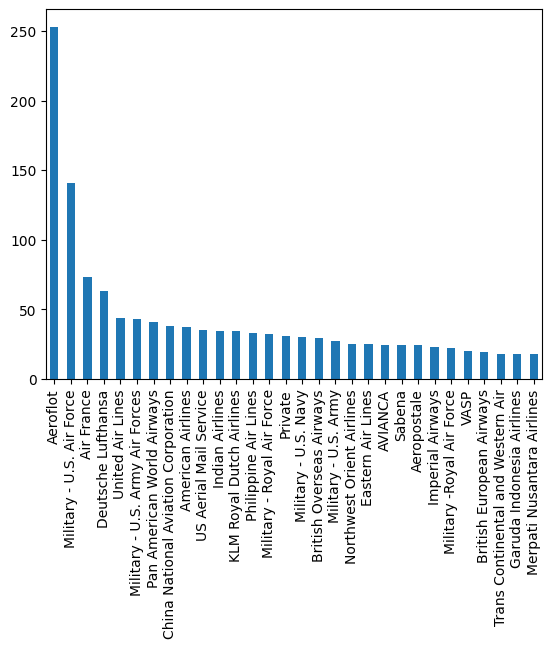

In [19]:
df['OperadOR'].value_counts().sort_values(ascending=False).head(30).plot(kind='bar')

Podemos apreciar que la Aerolinea que mas se repite es Aeroflot
Aeroflot es una de las aerolíneas más antiguas del mundo, fue fundada en 1923 como una empresa de propiedad totalmente estatal. En su época también fue la compañía aérea más importante de la Unión Soviética y la mayor del mundo.

Cantidad de acciedentes por ac_type

<Axes: >

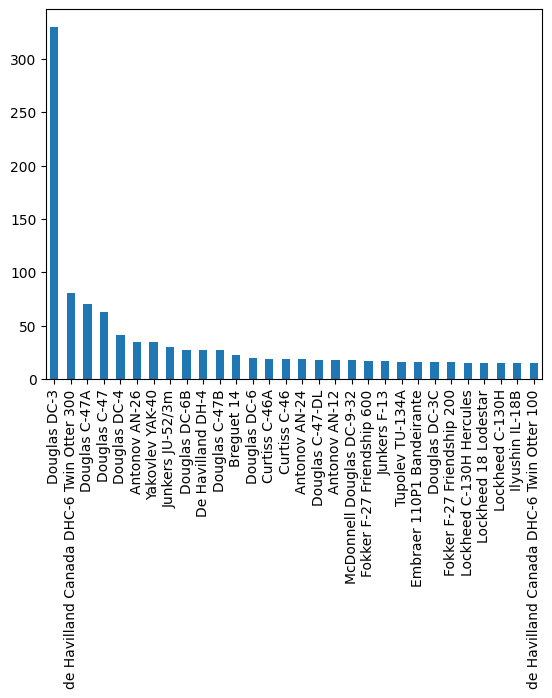

In [20]:
df['ac_type'].value_counts().sort_values(ascending=False).head(30).plot(kind='bar')

El avion que mas se repite en los registros de accidentes es el Douglas DC-3
El Douglas DC-3 es un avión que revolucionó el transporte de pasajeros en los 30 y 40 del siglo XX. Fue desarrollado por un grupo de ingenieros, encabezados por Arthur E. Raymond, y voló por primera vez en 1935. Su diseño fue tan avanzado a su época, que aún hoy día, 80 años después de su primer vuelo, se encuentra operando en número considerable en distintas partes del globo.

In [21]:
tipo_vuelo=df[df.OperadOR.notna()]
tipo_vuelo=tipo_vuelo.reset_index(drop=True)

In [22]:
vuelo_militar=tipo_vuelo[tipo_vuelo['OperadOR'].str.contains('Military')]
vuelo_civil=tipo_vuelo[~tipo_vuelo['OperadOR'].str.contains('Military')]

In [23]:
countm=vuelo_militar['year'].value_counts().sort_index()
countc=vuelo_civil['year'].value_counts().sort_index()

In [24]:
countm

1908    1
1912    1
1913    2
1915    2
1916    5
       ..
2017    1
2018    4
2019    2
2020    1
2021    3
Name: year, Length: 100, dtype: int64

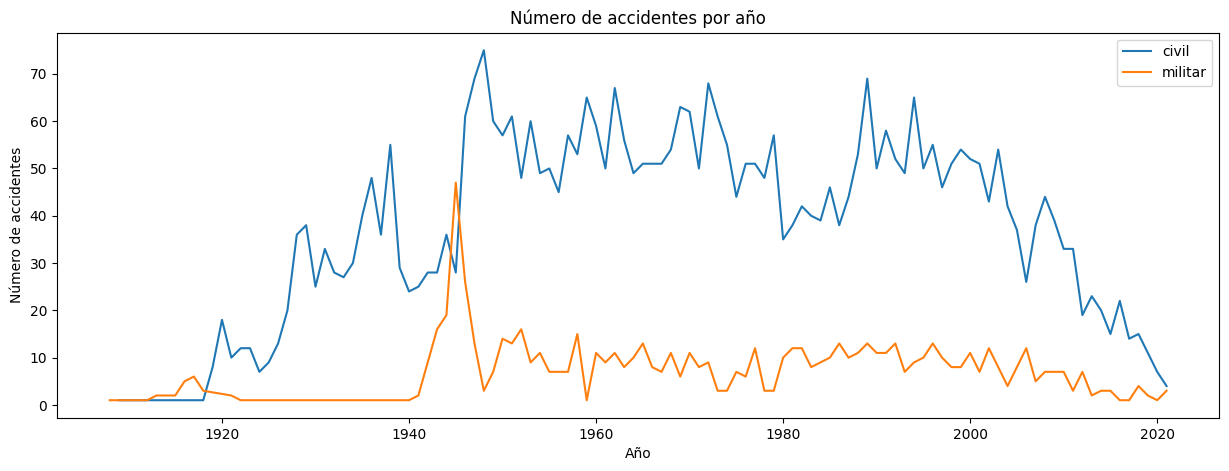

In [25]:
plt.figure(figsize=(15,5))
plt.plot(countc,label='civil')
plt.plot(countm,label='militar')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por año')
plt.legend()
plt.show()

En el anio 1920 podemos observar un aumento importante en el numero de accidentes aereos 'civiles' osea comerciales con relacion a los accidentes aereos militares,
tambien podemos notar un pico importante en los accidentes aereos militares alrededor del anio 1945 que es cuando se llevo acabo la segunda guerra mundial.

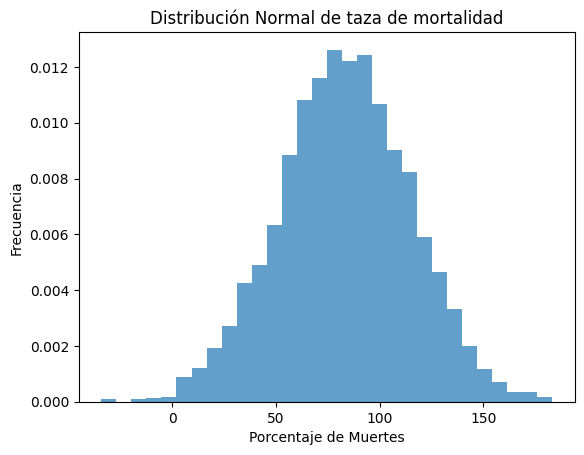

In [26]:
media =np.mean(df['mortality_rate'].apply(lambda x:x*100))
desviacion= np.std(df['mortality_rate'].apply(lambda x:x*100))
muestra= np.random.normal(media,desviacion,4000)
plt.hist(muestra, bins=30, density=True, alpha=0.7)


plt.xlabel('Porcentaje de Muertes')
plt.ylabel('Frecuencia')
plt.title('Distribución Normal de taza de mortalidad')


plt.show()

Buscamos relaciones entre variables y porcentaje de muertes

Menor taza de muertos

In [27]:
#muertes por operador
df[df['mortality_rate']<=.20]['OperadOR'].value_counts().sort_values(ascending=False)

Aeroflot                      19
Philippine Air Lines          13
Pan American World Airways    13
American Airlines             10
Air France                    10
                              ..
Hewa Bora Airways              1
Liard Air                      1
Djibouti Airlines              1
Eagle Aviation                 1
Air India Exppress             1
Name: OperadOR, Length: 329, dtype: int64

In [28]:
#muertes ac_type
df[df['mortality_rate']<=.20]['ac_type'].value_counts().sort_values(ascending=False)

Douglas DC-3                                41
de Havilland Canada DHC-6 Twin Otter 300    12
Yakovlev YAK-40                              7
Fokker 100                                   5
Douglas DC-4                                 5
                                            ..
Airbus A300B2-1C                             1
McDonnell-Douglas MD-82                      1
de Havilland DHC-6 Twin Otter 300            1
Britten-Norman BN-2A-8 Island                1
Boeing 737-8HG                               1
Name: ac_type, Length: 367, dtype: int64

In [29]:
df[df['mortality_rate']<=.20]['city'].value_counts().sort_values(ascending=False)

Manila            6
San Francisco     4
New York          4
Denver            3
Amsterdam         3
                 ..
Denpasar          1
Kudat             1
Ninia             1
Near Mogadishu    1
Calicut           1
Name: city, Length: 447, dtype: int64

Taza de muertos del 100%

In [30]:
#muertes por operador
df[df['mortality_rate']==1]['OperadOR'].value_counts().sort_values(ascending=False)

Aeroflot                           164
Military - U.S. Air Force          102
Air France                          47
Deutsche Lufthansa                  40
Military - U.S. Army Air Forces     35
                                  ... 
Suomen Urheiluilmailijat             1
Alisansa Colombia                    1
Military - Ukraine Air Force         1
Heringer Taxi Aero                   1
Kamchatka Aviation Enterprise        1
Name: OperadOR, Length: 1603, dtype: int64

In [31]:
#muertes ac_type
df[df['mortality_rate']==1]['ac_type'].value_counts().sort_values(ascending=False)

Douglas DC-3                                198
Douglas C-47A                                51
de Havilland Canada DHC-6 Twin Otter 300     46
Douglas C-47                                 41
Antonov AN-26                                26
                                           ... 
Tupolev TU-154M / C-141 Starlifter            1
Airbus A300-B4-200                            1
Rutan Long EZ (experimental aircraft)         1
Antonov AN-124-100                            1
Antonov An 26B-100                            1
Name: ac_type, Length: 1732, dtype: int64

In [32]:
df[df['mortality_rate']==1]['city'].value_counts().sort_values(ascending=False)

Atlantic Ocean           11
Manila                    8
Bogota                    8
Moscow                    8
Near Moscow               7
                         ..
Bandung                   1
Massamba                  1
Near El Alto de Rubio     1
Near Madiun               1
Palana                    1
Name: city, Length: 2703, dtype: int64

In [33]:
fatalities_year_df=df[['year','all_aboard','cantidad de fallecidos','mortality_rate']]

In [34]:
fatalities_year_df=fatalities_year_df.groupby('year').mean()

In [35]:
fatalities_year_df

,all_aboard,cantidad de fallecidos,mortality_rate
year,,,
1908,2.000000,1.000000,0.500000
1909,1.000000,1.000000,1.000000
1912,5.000000,5.000000,1.000000
1913,16.333333,14.333333,0.900000
1915,30.000000,18.000000,0.707317
...,...,...,...
2017,16.333333,14.266667,0.873778
2018,65.210526,46.000000,0.739989
2019,33.230769,23.461538,0.862353


Taza media de mortalidad por anio desde 1908 hasta 2021 

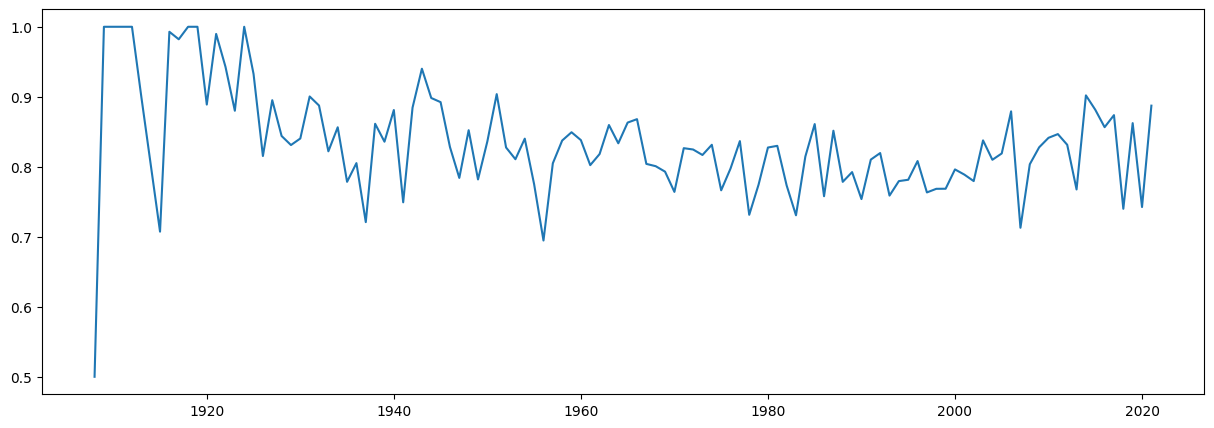

In [36]:
plt.figure(figsize=(15,5))
plt.plot(fatalities_year_df['mortality_rate'])


Taza de mortalidad del total de accidentes por anio

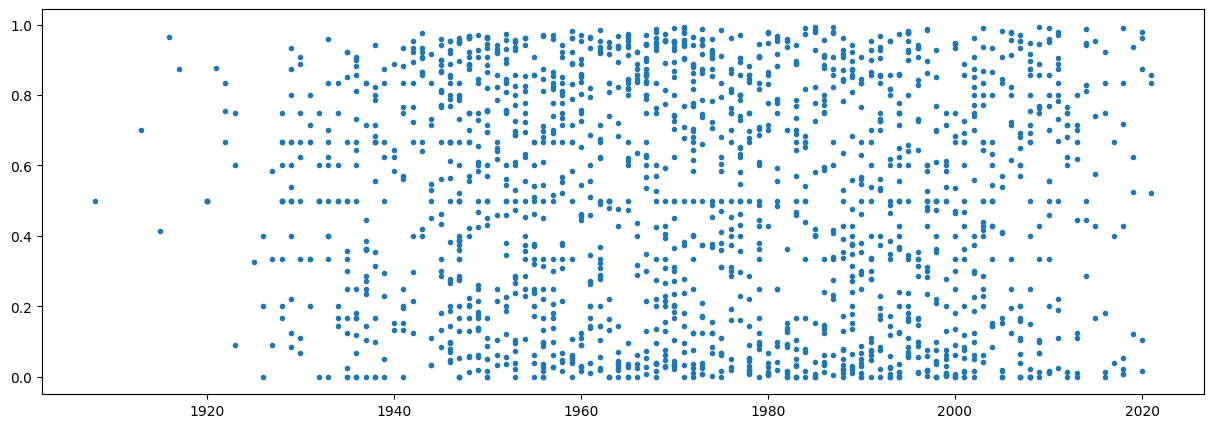

In [37]:
plt.figure(figsize=(15,5))
data =df[df['mortality_rate']<1]
plt.scatter(x=data['year'],y=data['mortality_rate'], s=9)


Cantidad de accidentes aereos.

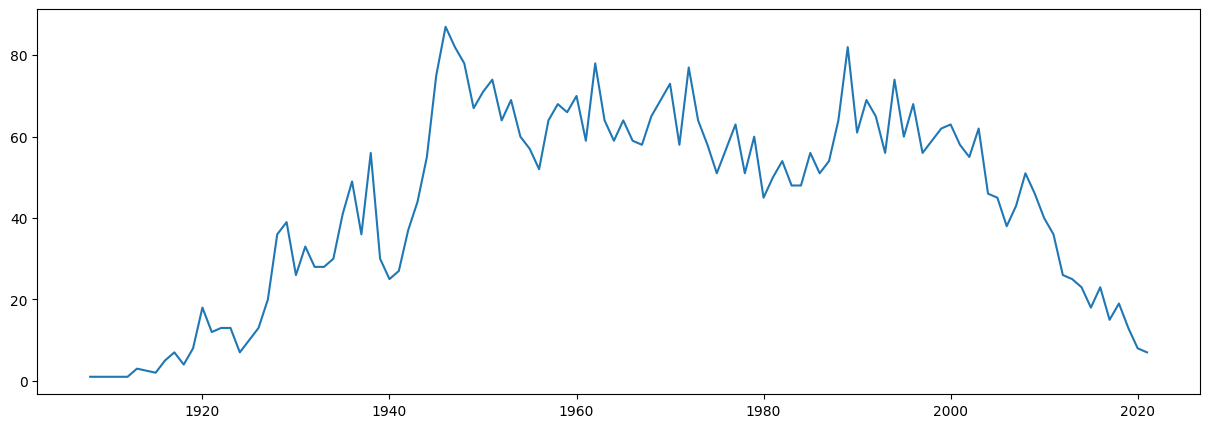

In [38]:
y=df['year'].value_counts().sort_index(ascending=True).values
x=df['year'].value_counts().sort_index(ascending=True).index
plt.figure(figsize=(15,5))
plt.plot(x,y)

In [39]:
vuelos_df=pd.read_csv('../PIH_DA/Datas_sets/API_IS.AIR.DPRT_DS2_es_csv_v2_5463649.csv')


In [40]:
arr=[]
for i in range(1970,2022):
    
    arr.append(vuelos_df[str(i)].sum())


In [41]:
vuelos_totales_df=pd.DataFrame(df[df['year']>=1970]['year'].value_counts().sort_index())

In [42]:
vuelos_totales_df['vuelos_totales']=arr

In [43]:
df=df.replace('?',np.nan)

In [44]:
df.shape

(4991, 17)